In [63]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable as V
from torchvision import transforms
from skimage import io
import matplotlib.pyplot as plt

from datareader import *
from utils import *

In [33]:
%matplotlib inline

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
m = torch.load('./unet_1024_aug_2.0.pt').to(device)

In [11]:
xnames, ynames = load_train_csv()

In [97]:
tfms = transforms.Compose([ToTensorTarget(),
                           NormalizeTarget(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])])
# tfms = transforms.Compose([ToTensorTarget()])
ds = DataStream(xnames, ynames, sz=512, transform=tfms)

In [98]:
instance = next(iter(ds))
x = V(instance['sat']).to(device)
y = V(instance['mask']).to(device)
y_hat = m(x.unsqueeze(0))

(-0.5, 511.5, 511.5, -0.5)

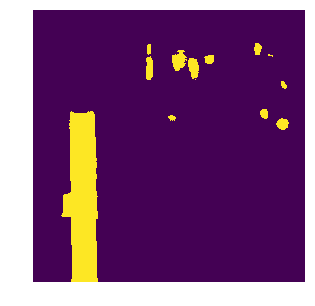

In [99]:
plt.figure(figsize=(5,5))
plt.imshow(y_hat.cpu().detach().numpy().reshape(512,512) > 0)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

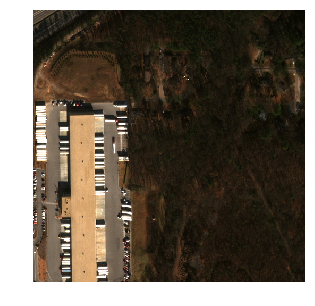

In [96]:
plt.figure(figsize=(5,5))
plt.imshow(np.moveaxis(x.cpu().detach().numpy(), 0, -1))
plt.axis('off')

In [100]:
im1 = io.imread('./misc/out.png')
im2 = io.imread('./misc/in.png')

In [101]:
io.imsave('./misc/both.png', np.hstack((im2, im1)))